In [1]:
import numpy as np
import tensorflow as tf

C:\Users\user\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Tensorflow

## (1) tf. constant 

In [10]:
hello = tf. constant("hello")
print(hello)
sess= tf.Session()
sess.run(hello)

Tensor("Const_3:0", shape=(), dtype=string)


b'hello'

In [11]:
b=tf.constant(3)
c=tf.constant(4)
sess.run(b+c)

7

## (2) tf. Variable

In [13]:
a=tf.fill((4,4),10)
sess.run(a)


array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [14]:
b=tf.zeros((4,4))
sess.run(b)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [15]:
c=tf.random_normal((4,4),mean=0,stddev=1.0)
sess.run(c)

array([[ 0.02602728, -0.030192  , -0.38587454,  0.45674285],
       [-2.1853266 ,  0.5256979 ,  1.5572828 ,  0.86760986],
       [ 0.6483018 , -1.5989625 , -0.41863093,  0.4993519 ],
       [ 0.8166921 ,  0.83196175, -0.35533398, -0.2993573 ]],
      dtype=float32)

In [16]:
my_ops = [a,b,c]
for op in my_ops:
    print(sess.run(op))

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[-0.7613856  -0.5805442  -0.09960067  1.6954628 ]
 [ 0.43025145 -0.5960449   0.11065152  2.3403828 ]
 [ 0.829412   -0.40086555  1.0650457   0.52729946]
 [-0.34542617 -0.72551256 -0.61332625  0.8888265 ]]


In [20]:
a=tf.constant([[1,2],[3,4]])
b=tf.constant([[10],[100]])
result=tf.matmul(a,b)
sess.run(result)

array([[210],
       [430]])

## Variable: W & Placeholder

### (1) Place holder : empty -> feed during training (declare) 
### (2) Variables : tuned during training


In [21]:
my_temp = tf.random_uniform((4,4),0,1)
sess.run(my_temp)

array([[0.28791094, 0.19986427, 0.7091613 , 0.4456302 ],
       [0.10343981, 0.85812676, 0.80581486, 0.92516565],
       [0.7087383 , 0.29158676, 0.56354976, 0.03534842],
       [0.5854548 , 0.30823958, 0.14509869, 0.13440502]], dtype=float32)

In [23]:
my_var = tf.Variable(initial_value = my_temp)
# sess.run(my_var) : error (initialization is required)
init = tf.global_variables_initializer()
sess.run(init)
sess.run(my_var)

array([[0.88820875, 0.40231228, 0.3638723 , 0.1580317 ],
       [0.8715688 , 0.7658297 , 0.4564736 , 0.02836084],
       [0.4934522 , 0.8275281 , 0.4094975 , 0.97547364],
       [0.6342716 , 0.50513804, 0.73155415, 0.73180914]], dtype=float32)

In [24]:
init = tf.global_variables_initializer() # 매번 다른 값 
sess.run(init)
sess.run(my_var)

array([[0.20896041, 0.7114209 , 0.8491584 , 0.59347224],
       [0.48639286, 0.8312377 , 0.2204901 , 0.6587466 ],
       [0.27912807, 0.5070672 , 0.12144732, 0.06575239],
       [0.5103109 , 0.75997925, 0.06244349, 0.8253182 ]], dtype=float32)

In [27]:
'''my_dict = {'aa': 3, 'bb' : 7}
   my_dict["aa"]
'''

3

In [28]:
a= tf.placeholder(tf.float32)
b= tf.placeholder(tf.float32)
c= a+b
sess.run(c,feed_dict = {a :10,b:20})

30.0

## Simple Linear Regression

In [119]:
from sklearn import datasets
import matplotlib.pyplot as plt

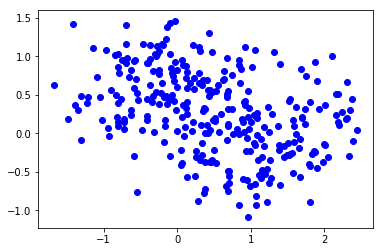

In [120]:
N=300 
X,y = datasets.make_moons(N,noise=0.3)
plt.scatter(X[:,0],X[:,1], c= "blue")

In [156]:
Y= y.reshape(N)

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20)

In [158]:
X_train.shape

(240, 2)

In [159]:
Y_train.shape

(240,)

In [160]:
num_hidden = 3
x= tf.placeholder(tf.float32,shape = [None,2])
t= tf.placeholder(tf.float32,shape = None)

In [161]:
W1 = tf.Variable(tf.random_normal([2,num_hidden],mean=0,stddev =1.0 ))
b1= tf.Variable(tf.zeros([1,num_hidden]))
z1= tf.matmul(x,W1)+b1
a1= tf.nn.relu(z1)

In [162]:
W2 = tf.Variable(tf.random_normal([2,num_hidden],mean=0,stddev =1.0 ))
b2= tf.Variable(tf.zeros([1,1]))
z2= tf.matmul(x,W2)+b2
a2= tf.nn.sigmoid(z2)

cross_entropy = -tf.reduce_sum(t*tf.log(a2) + (1-t)*tf.log(1-a2))

In [163]:
my_optimizer = tf.train.GradientDescentOptimizer(0.05)
train_step = my_optimizer.minimize(cross_entropy)

## Preparation for result

In [164]:
correct_prediction = tf.equal( tf.to_float(tf.greater(a2,0.5)),t)
my_prediction = tf.cast(tf.greater(a2,0.5),tf.float32)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [165]:
batch_size=30
n_batches=N//batch_size
n_batches

10

In [166]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [167]:
from sklearn.utils import shuffle

In [168]:
for epoch in range(1000):
    
        X_,Y_=shuffle(X_train,Y_train)
        
        for i in range(n_batches):
                start = i*batch_size
                end = start + batch_size 
        
                sess.run(train_step, feed_dict = { x:X_[start:end,:], t:Y_[start:end] })

InvalidArgumentError: Incompatible shapes: [30] vs. [30,3]
	 [[Node: gradients_6/mul_12_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_6/mul_12_grad/Shape, gradients_6/mul_12_grad/Shape_1)]]

Caused by op 'gradients_6/mul_12_grad/BroadcastGradientArgs', defined at:
  File "C:\Users\user\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\user\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\user\Anaconda\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\user\Anaconda\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\user\Anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\user\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\user\Anaconda\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\user\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\user\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\user\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\user\Anaconda\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\user\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-163-316bbd4bf622>", line 2, in <module>
    train_step = my_optimizer.minimize(cross_entropy)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\training\optimizer.py", line 399, in minimize
    grad_loss=grad_loss)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\training\optimizer.py", line 511, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 532, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 701, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 396, in _MaybeCompile
    return grad_fn()  # Exit early
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 701, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py", line 876, in _MulGrad
    rx, ry = gen_array_ops.broadcast_gradient_args(sx, sy)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 673, in broadcast_gradient_args
    "BroadcastGradientArgs", s0=s0, s1=s1, name=name)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'mul_12', defined at:
  File "C:\Users\user\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 22 identical lines from previous traceback]
  File "C:\Users\user\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-162-e6d9f13d82af>", line 6, in <module>
    cross_entropy = -tf.reduce_sum(t*tf.log(a2) + (1-t)*tf.log(1-a2))
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\math_ops.py", line 847, in binary_op_wrapper
    return func(x, y, name=name)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1091, in _mul_dispatch
    return gen_math_ops.mul(x, y, name=name)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4758, in mul
    "Mul", x=x, y=y, name=name)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\Users\user\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [30] vs. [30,3]
	 [[Node: gradients_6/mul_12_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_6/mul_12_grad/Shape, gradients_6/mul_12_grad/Shape_1)]]


In [ ]:
accuracy = accuracy.eval(session =sess, feed_dict= { x: X_test, t: Y_test})
accuracy

In [169]:
tt = my_prediction.eval(session = sess, feed_dict = { x: X_test, t: Y_test})
tt

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1

In [150]:
plt.scatter(X[:,0],X[:,1],alpha = 0.1, cmap = "autumn")
plt.scatter(X_test[:,0],X_test[:,1],alpha = 1, cmap = "autumn",c=tt.reshape((60))

SyntaxError: unexpected EOF while parsing (<ipython-input-150-dc93cb7cf4d6>, line 2)